SSE 644 Project 3
=====================
Sarah Kashin

December 11, 2017

## Table Of Contents

I. [Introduction](#Introduction)

&nbsp;&nbsp;&nbsp;&nbsp;a. [Image Processing for Medical Devices](#Image Processing for Medical Devices)
   
&nbsp;&nbsp;&nbsp;&nbsp;b. [Version Control](#Version Control)
   
&nbsp;&nbsp;&nbsp;&nbsp;c. [Scientific Packages](#Scientific Packages)

II. [Image Processing](#Image Processing)
   
&nbsp;&nbsp;&nbsp;&nbsp;a. [Histogram Equilization](#Histogram Equilization)
   
&nbsp;&nbsp;&nbsp;&nbsp;b. [Filters](#Filters)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. [Gaussian Masks](#Gaussian Masks) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. [Sobel Operators](#Sobel Operators)  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. [Thresholding](#Thresholding)
   
&nbsp;&nbsp;&nbsp;&nbsp;c. [Segmentation](#Segmentation) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. [Otsu Thresholding](#Otsu Thresholding) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. [Closing](#Closing)  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. [Counting](#Counting)
   
III. [Machine Learning](#Machine Learning)

IV. [Profiling](#Profiling)
   
&nbsp;&nbsp;&nbsp;&nbsp;a. [%timeit Magic Command](#%timeit Magic Command)
  
&nbsp;&nbsp;&nbsp;&nbsp;b. [memory_profiler Package](#memory_profiler Package)
   
&nbsp;&nbsp;&nbsp;&nbsp;c. [Other Profiling Techniques](#Other Profiling Techniques)   

V. [Conclusion](#Conclusion)

## I. Introduction <a id='Introduction'></a>

This paper presents the topics learned in  the *IPython Interactive Computing and Visulization Cookbook* by Cyrille Rossant.  IPython is a command shell for interactive computing.  It was originally developed for Python, however it can be used in multiple programming languages.  Python 3.6 was used in Jupyter Notebook for this project.  Jupyter is a web based interactive notebook used for displaying and sharing of scientific research so that results and work can easily be understood by other researchers.  The user is able to write code in cells and run each cell individually or multiple cells together.  The output is shown below the cell.  This is extremely useful, as the user can run and troubleshoot cells one at a time.  Cells can output much more than just strings and calculations.  Cells also can output rich text and multimedia in order to explain the code as the user goes, as is demonstrated with this notebook.  Rich text can also incorporate hyperlinks to other markdown cells, as was seen in the Table of Contents.


IPython is ideal when learning to analyze and visualize data.  Python is a language that enables people to quickly and efficiently write code to solve problems. It uses simplified syntax for readability as well as contains libraries that will perform large tasks for programmers.  This paper discusses the project developed to demonstrate the topics learned in the text and also highlights some additional topics.

### a. Image Processing for Medical Devices <a id='Image Processing for Medical Devices'></a>

Medical diagnosis is one of the most important applications of image processing.  Medical imaging systems take input signaps which arise from various properties of the body of a patient and create resulting images, which can be analog or digital.  The greatest challenge that developers in this field face is obtaining an output image that is an accurate representaion of the input signal.  Images are often over or under exposed, have noise in them, or other interference.  Medical professionals must be able to alter these images in order to be able to see what is really going on inside a patient and thus properly diagnose.  Python has many ways of analyzing images, some of which can be used to help alter images from medical devices.  This paper explores the use of these methods and other advanced topics in python.

Images used for this paper were from the image package of *Digital Image Processing for Medical Devices* by Geoff Dougherty.

### b. Version Control <a id='Version Control'></a>
Version control is the process of keeping a software system consisting of many versions and configurations well orgainzed.  Version control is very important and helpful especially when multiple people are working together.  It allows the user to "pull" the code, make changes, "push" the code to the repository, and commit these changes and leave a reason as to why those changes were made.  The user can then see what changes have been made and the reason behind it.

There are many different systems available to users such as Git, Mercurial, and Bazaar.  I used Git, and this project can be found at https://github.com/skashin95/SSE644Proj3.


### c. Scientific Packages <a id='Scientific Packages'></a>
Importing scientific packages allows the user to use the tools within the packages.  The packages in this project are numpy, matplotlib, and sk-image.  Numpy is a package for scientific computing.  It includes many components such as arrays, the ability to integrate other programming languages, and linear algebra.  Pandas is a library that provides structures and functions for manipulating data as well as provides a means to visualize this data. Matplotlib is used to further visualize the data.  Scikit-image is an image processing package.  Scikit-learn is a machine learning package.

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import skimage.exposure as skie
import skimage.filters as skif
import skimage.data as skid
import sklearn

%matplotlib inline

## II. Image Processing<a id='Image Processing'></a>

There are many different methods of image processing for medical purposes.  The sci-images packages is specifically made for image processing, and contains functions that emulate processes actually used in the medical field in order to process images and thus diagnose patients.

### a. Histogram Equilization <a id='Histogram Equilization'></a>


Entropy is a measure of the amount of disorder or randomness in a system.  A low-entropy system occupies a small number of states, while a high-entrophy system occupies a large number of states.  In an image, these states correspond to the number of gray levls which the individual pixels can adopt.  The number of gray levels in an image is found by the formula 2^n, where n is the number of pixels in an image.  Therefore, an 8-bit pixel image has 256 gray levels, or states.  If all the states are equally occupied, the image has a uniformly distributed gray-level histogram and the spread of the states has the maximum possible value.  If an image only has two states, the pixels are all either black or white and the image has low entropy.  Entropy measures the average global information content of an image in bits per pixel.  The lower the entropy, the less information the image contains.  

Histogram equalization is important for several uses in the medical imaging field.  It envolves changing the histogram of an image into a flat, uniform or equalized histogram, in which every pixel value occurs equally.  This maximizes the information conveyed in the image, and thus the transformed image has an enhanced appearance.  This can be used to better see an image and to compare the image to others.

The show() method produces an image of a MRI and its histogram.  The histogram represents the gray scale level of all of the pixels in the image.  0 is the equivalent of black, and 256 is the equivalent of white. The image is very dark; the histogram confirms this as the values of the pixels are all almost all under 100.  You are able to see some details of the brain; however, it is possible that more are hidden.

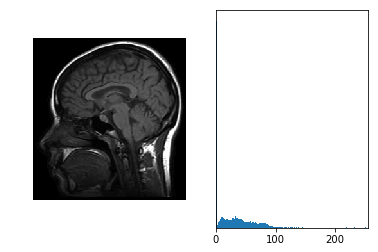

In [21]:
img = plt.imread('mri.tif')

def show(img):
    plt.subplot(121)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(122)
    plt.hist(img.ravel(), lw=0, bins=256)
    plt.xlim(0, img.max())
    plt.yticks([])
    plt.show()
    
show(img)

The first method below uses the rescale_intensity function.  the in_range and out_range parameters define a linear mapping from the original image to the modified image.  Pixels that are outside of the in_range are clipped to the extremal values of the out_range.  Thus, pixels with intensity less than 100 become completely black and pixels with intensity over 240 become completely white.  As seen, this method does not work well on this image.  It is now almost completely black, and all details are lost.

The second method below uses the Contrast Limited Adaptive Histogram Equalization (CLAHE) technique.  It accurately displays histogram equilization.  This function splits the image into rectangular sections and computes the histogram for each section. Then the intensity values of the pixels are redistributed to improve the contrast and enhance the details.  The details are much easier to see in the third image, and the histogram shows that the grayscales are much closer to being equal.  Note that the scale changes during histogram equalization and 1 is equivalent to 256, or white.

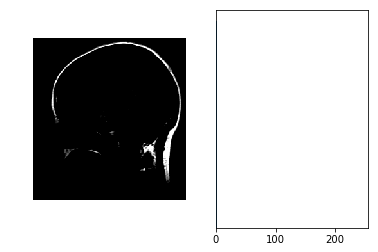

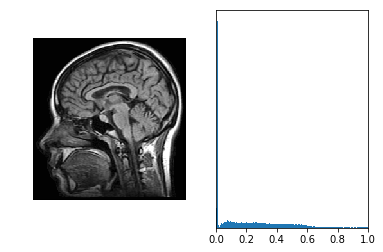

In [24]:
show(skie.rescale_intensity(img, in_range=(100,240), out_range=(0,255)))
show(skie.equalize_adapthist(img))

### b. Filters <a id='Filters'></a>

Sharpening is used to produce a crispter image with sharper edges in order to highlight fine detail.  One method of sharpening an image is by unsharp masking.  The original blurred has a fraction of it subtracted resulting in a sharpened image.  The process of doing this consist of smothing the original image with an averaging mask, and then subtracting this from the original image.  There are different methods of creating an averaging mask, which include: Gaussian, Sobel, and thresholding.  

Below is an image of an angiogram, which is an x-ray test that uses a special dye and camera to take pictures of the blood flow in an artery.  This section will demonstrate filtering the angiogram with Gaussian masks, Sobel operators, and thresholding.

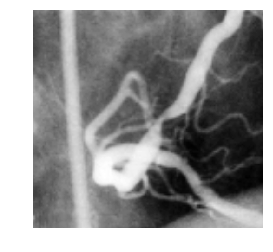

In [45]:
def show1(img1):
    plt.imshow(img1, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    
img1= plt.imread('angiogram.tif')
show1(img1)

#### i. Gaussian Masks <a id='Gaussian Masks'></a>

Gaussian masks have a bell-shaped profile with a high value element in the center and symmetrical tapering on either side.  The gradual tapering of their profile reduces "ringing" in the final image.  Gaussian masks are separable, so they are implemented by using a one-dimentional horizonatal Gaussian and a one-dimentional vertical Gaussian.  The final filtered image is found by the following formula: mask1 + alpha * (mask1-mask2).

The following cell filters the above angiogram.  The first two images are the gaussian masks and the last image is the final filtered image.

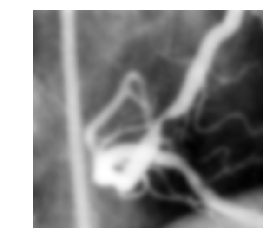

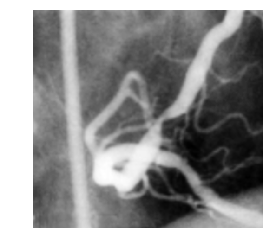

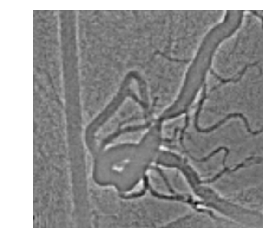

In [76]:
mask1 = skimage.filters.gaussian(img1,5.)  #horizontal mask
show1(mask1)
mask2 = skimage.filters.gaussian(img1,1.) #vertical mask
show1(mask2)
final = mask1 + 30*(mask1-mask2)
show1(final)

#### ii. Sobel Operators <a id='Sobel Operators'></a>

Sobel operators take the derivatives in one direction, either horizontal or vertical, while smoothing by weighted averaging in the orthoginal direction.  Sobel operators are especially effective at suppressing noise.  The resulting x and y component edge images from convolution with the Sobel operators are combined pixel by pixel to gice a madnitude-of-the-edges.

The following cell shows the angiogram after being filtered by the Sobel operators.

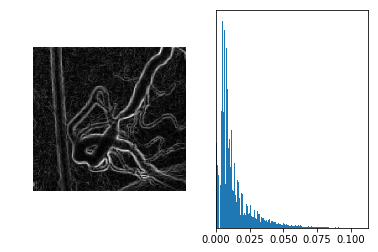

In [77]:
sobimg = skif.sobel(img1)
show(sobimg)

#### iii. Thresholding <a id='Thresholding'></a>

Thresholding is an easy way to perform segmentation on the basis of different intensities or colors of an image.  It converts a grayscale image into a binary image of black and white pixels only.  Usually black pixels correspond to the background and white to the foreground.  The segmentation is determined by a single parameter: the threshold intensity.  Each pixel in the image is compared to this threshold.  If the value of the pixel is less than or eqaul to the threshold, it is set to black, and if the value of the pixel is greater than the threshold, it is set to white.

The following cell creates a widget wich allows the user to alter the threshold intensity.  The ideal threshold is around 0.02.

In [82]:
from IPython.html import widgets
@widgets.interact(x=(0.001, 0.15, 0.0005))
def edge(x):
    show1(sobimg<x)   


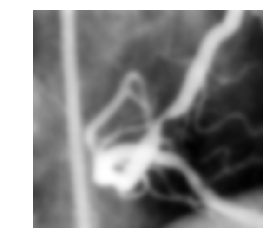

In [81]:
img2= plt.imread('salt-and-pepper1.tif')

show1(skimage.restoration.denoise_tv_bregman(mask1,5.))

### c. Segmentation <a id='Segmentation'></a>

Segmentation is the partitioning of an image into meaningful regions.  For image processing, it is most frequently used to distinguish objects or regions of interest (the foreground) from everything else in the image (the background).  Segmentation has many uses, such as detecting organs and distinguishing pathological tissue, such as tumors. Psuedocolor can also be added to the images once they have been segmented.  Segmentation is the first stage in patter recognition systems.  Once the objects of interest are isolated from the rest of image, characteristic measurements can be made on them, and the objects can be classified into particular groups or classes.  

Beans are often used as sample images for testing out image processing techniques.  Thus, a stock photo of beans was used to test out the techniques demonstrated below.  The task at hand is to find just the black beans in the image.  This image was also obtained from the *Digital Image Processing for Medical Applications* textbook package.

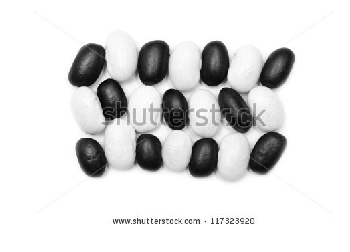

In [263]:
from skimage.segmentation import clear_border
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
from skimage.measure import regionprops, label
from skimage import color
from skimage import io
from skimage.data import coins

# Makes image grayscale
beans = color.rgb2gray(io.imread('beans4.jpg'))

show1(beans)

#### i. Otsu Thresholding <a id='Otsu Thresholding'></a>

The Otsu method of thresholding describes the gray-level histogram of an image as a probability distribiution.  This method maximizes the between-class variance.  In order to do this, a value (k)  is chosen to to maximize the separation of the two classes: the froground and the background.  The sci-image package's threshold_otsu function finds the k value and applies it to the image, as demonstrated in the next two cells.  

In [264]:
k = threshold_otsu(beans) 
print("k = " + str(k))

k = 0.584219627757


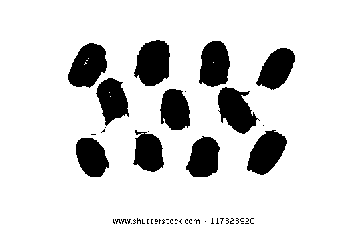

In [265]:
show1(beans > k)

As the image above shows, the watermark and shine on the beans interfered with the Otsu thresholding.  While the black beans have begun to be separated from the background, the watermark and the shadow of the white beans are being inclueded in the foreground with the black beans.  The widget below allows the k value to be altered by hand.  The ideal k value was found to be around 0.47.

In [266]:
from IPython.html import widgets
@widgets.interact(t=(0,1,0.005))
def threshold1(t):
    show1(beans>t)

#### ii. Closing <a id='Closing'></a>

In binary images, dilation is an operation that increases the size of the foreground objects, which are generally shown as white pixels.  This is done by superimposing a strucuring element on top of each pixel of the input images.  If at least one pixel in the structuring element coincides with a foreground pixel in the original image, the corresponding pixel in the output image is set to foreground.  This causes holes inside a foreground region to shrink and sharp corners to be smoothed.  

Erosion is essentially the opposite of dilation.  Erosion increases the size of background objects, which are generally shown as black pixels.  It also uses a structuring element, but If at least one pixel in the structuring element coincides with a background pixel in the original image, the corresponding pixel in the output image is set to background.

Closing is defined as dilation followed by erosion using the same structuring element for both operations.  Closing smooths the contours of foreground objects, merges narrow breaks or gaps,  and eliminates small holes. 

Closing was performed below using a square structural element with a side length of 6.  This successfully removes the "holes" caused by shine on the beans and most of the remaining shadow of the white beans. 

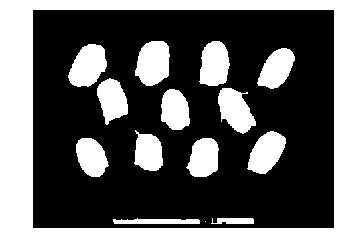

In [267]:
img_bin = clear_border(closing(beans<0.47, square(6)))
show1(img_bin)

The final segmantation is show in the cell below.  The sci-images package is able to areas of interest, which it has successfully done to all of the black beans.

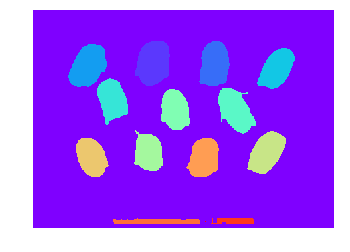

In [288]:
labels = label(img_bin)
show2(labels, cmap=plt.cm.rainbow)

#### iii. Counting <a id='Counting'></a>

Python is also able to count the number of objects for the user.  The size of the area of the objects of interest are specified, and then the number of objects greater or equal to that size are counted.  The first cell prints out the number of black beans in an output cell, and the next cell prints out the number of each bean on the screen.

In [291]:
regions = regionprops(labels)
boxes = np.array([label['BoundingBox'] for label in regions if label ['Area'] > 1000])
print("There are {0:d} black beans.".format(len(boxes)))

There are 11 black beans.


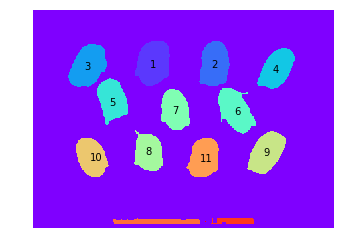

In [363]:
plt.imshow(labels, cmap=plt.cm.rainbow)
plt.axis('off')
xs = boxes[:,[1,3]].mean(axis=1)
ys = boxes[:,[0,2]].mean(axis=1)
for i, box in enumerate(boxes):
    plt.text(xs[i]-5, ys[i]+5, str(i+1))

## III. Machine Learning <a id='Machine Learning'></a>

Clustering is a part of unsupervised machine learning.  Unsupervised learning helps discover systemic structures in data.  The beans picture from above was used to test out two clustering functions: MeanShift and AffinityPropagation.  These algorithms try to define different groups of data based on a data set.  The "True Value" image shows what the functions are given.  The next two images are what the functions have been able to come up with.  It can be seen that the black beans stand out; however, it is unable to tell them completely apart from the white beans or the watermark.

In [323]:
from itertools import permutations
import sklearn.decomposition as dec
import sklearn.cluster as clu
import sklearn.datasets as ds
import sklearn.grid_search as gs
import sklearn.cross_validation as cv
import sklearn.neighbors as nb

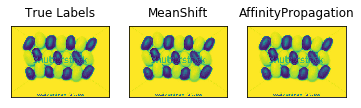

In [340]:
X = beans
ax = plt.subplot(231)
ax.matshow(X)
plt.xticks([]); plt.yticks([])
plt.title("True Labels")
for i, est in enumerate([clu.MeanShift(),clu.AffinityPropagation()]):
    est.fit(X)
    ax = plt.subplot(232+i)
    ax.matshow(X) 
    plt.xticks([]); plt.yticks([])
    plt.title(est.__class__.__name__)

### IV. Profiling <a id='Profiling'></a>

Profiling is the process of getting a detailed report of the execution time, function by function.  The total time represents how long the interpreter stays in a given function, excluding the time spent in calls to subfunctions.  The cumulative time includes the time spent in calls to subfunctions.  

### a.%timeit Magic Command <a id='%timeit Magic Command'></a>

The %timeit magic and magic cell allows the user to evaluate the time taken by Python statements.  This command accepts several optional parameters.  The default is chosen to run within a few seconds, but it can be specified otherwise.  Benchmarking is the process of comparing the execution times of different versions of a function, which the %timeit magic command is extremely useful for.  

The following cell times the machine language functions.  The first output is MeanShift() and the second is AffinityPropagation().  It can be seen that MeanShift() is significantly longer than AffinityProgation().

In [360]:
for i, est in enumerate([clu.MeanShift(),clu.AffinityPropagation()]):
    %timeit est.fit(X)  

1 loop, best of 3: 1.32 s per loop
1 loop, best of 3: 395 ms per loop


### b. memory_profiler Package<a id='memory_profiler Package'></a>

Memory-optimized code is extremely important in order to make a program run faster.  The memory_profiler package checks the memory usage of the interpreter at every line.  The increment column allows the user to easily see where the largest amounts of memory are allocated.  The %memit magic command is part of the memory_profiler package.  It allows the user to see the amount of memory allocated by a single python statement.

The following cell measures the memory that each machine language functions uses.  The first output is MeanShift() and the second is AffinityPropagation().  It can be seen that the two functions use about the same amount of memory; however,  MeanShift() uses slightly more than AffinityProgation().

In [361]:
for i, est in enumerate([clu.MeanShift(),clu.AffinityPropagation()]):
    %memit est.fit(X)  

peak memory: 129.04 MiB, increment: 2.65 MiB
peak memory: 131.47 MiB, increment: 2.43 MiB


### c. Other Profiling Techniques <a id='Other Profiling Techniques'></a>

#### i.	%prun Magic Command
The %prun line magic and %%prun cell magic allow the user to profile a single line or an entire cell.  The user can use “-s” to sort the report by columns, “-q” to suppress the pager output, “-l” to limit the number of lines displayed or filter by function, and “-T” to save the report into a text file.   

#### ii. cProfile
cProfile breaks down the execution time into the contributions of all called functions.  It is especially useful for GUIs.

#### iii. line_profiler Module
The external Python module line_profiler allows users to profile line-by-line.  It displays the time spent on each line of the profiled functions.  This can be displayed in either timer units or as a fraction of the total execution time.

### V. Conclusion <a id='Conclusion'></a>

In conclusion, the IPython notebook is a powerful method for processing images in many ways and maximizing the potential of these methods.  In order to show aptitude in the utilization of the IPython notebook, image processing was performed on real life examples from the medical field. To aid in this, many scientific pacakges were used.  Machine language was explored as another method, and finally profiling was done in order to find the best option.